In [1]:
import pandas as pd
import pandas_profiling as pd_profiling

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('consumo-agua.csv')

dataset

In [4]:
dataset.shape

(71102, 17)

In [5]:
dataset.nunique(axis = 0)

Geo Point               22930
Geo Shape               22922
consumo_total_mixto     24339
anio                        1
nomgeo                     17
consumo_prom_dom        52060
consumo_total_dom       47051
alcaldia                   16
colonia                  1340
consumo_prom_mixto      31911
consumo_total           56015
consumo_prom            62214
consumo_prom_no_dom     37440
bimestre                    3
consumo_total_no_dom    27336
gid                     71102
indice_des                  4
dtype: int64

In [6]:
dataset.dtypes

Geo Point                object
Geo Shape                object
consumo_total_mixto     float64
anio                      int64
nomgeo                   object
consumo_prom_dom        float64
consumo_total_dom       float64
alcaldia                 object
colonia                  object
consumo_prom_mixto      float64
consumo_total           float64
consumo_prom            float64
consumo_prom_no_dom     float64
bimestre                  int64
consumo_total_no_dom    float64
gid                       int64
indice_des               object
dtype: object

Es necesario ver qué tipo de variables son realmente, no únicamente por cómo le ve Python, si no con fines prácticos

dataset.alcaldia.value_counts()

dataset.nomgeo.value_counts()

In [7]:
dataset.columns.str.lower().str.replace(" ", "_")

Index(['geo_point', 'geo_shape', 'consumo_total_mixto', 'anio', 'nomgeo',
       'consumo_prom_dom', 'consumo_total_dom', 'alcaldia', 'colonia',
       'consumo_prom_mixto', 'consumo_total', 'consumo_prom',
       'consumo_prom_no_dom', 'bimestre', 'consumo_total_no_dom', 'gid',
       'indice_des'],
      dtype='object')

In [8]:
def clean_strings(index_obj):
    obj = index_obj.str.lower().str.replace(" ", "_")
    return obj
    

In [9]:
dataset.columns = clean_strings(dataset.columns)

#dataset

profiling = dataset.profile_report()
profiling

In [10]:
dataset.drop(columns = ["geo_shape"], inplace = True)
dataset.head()

,geo_point,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des
0,"19.4552601937,-99.1126617526",159.72,2019,Gustavo A. Madero,42.566364,468.23,GUSTAVO A. MADERO,7 DE NOVIEMBRE,53.24,631.00,42.066667,3.05,3,3.05,57250,ALTO
1,"19.4552601937,-99.1126617526",0.00,2019,Gustavo A. Madero,35.936667,107.81,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,115.13,28.782500,7.32,3,7.32,57253,MEDIO
2,"19.4557195871,-99.1135822797",0.00,2019,Gustavo A. Madero,24.586000,122.93,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,197.96,32.993333,75.03,3,75.03,57255,POPULAR
3,"19.4596467168,-99.1044693641",0.00,2019,Gustavo A. Madero,0.000000,0.00,GUSTAVO A. MADERO,NUEVA TENOCHTITLAN,0.00,253.53,84.510000,84.51,3,253.53,57267,BAJO
4,"19.4741606185,-99.1467497317",56.72,2019,Azcapotzalco,67.436250,539.49,AZCAPOTZALCO,PROHOGAR,56.72,839.35,76.304545,121.57,3,243.14,57330,BAJO


In [11]:
lat_long = dataset.geo_point.str.split(",", expand = True)

lat_long.columns = ["latitud", "longitud"]

lat_long = lat_long.astype('float64')

#lat_long

In [12]:
data_clean = pd.concat([dataset, lat_long], axis = 1).drop(columns = 'geo_point')
#data_clean

In [13]:
data_clean['alcaldia'] = data_clean.alcaldia.str.lower()
data_clean['colonia'] = data_clean.colonia.str.lower()
data_clean['indice_des'] = data_clean.indice_des.str.lower()


#data_clean

In [14]:
#data_clean.dtypes

profiling2 = data_clean.profile_report()
profiling2

In [15]:
data_clean

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.240000,631.00,42.066667,3.050000,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.000000,115.13,28.782500,7.320000,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.000000,197.96,32.993333,75.030000,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.000000,253.53,84.510000,84.510000,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.720000,839.35,76.304545,121.570000,3,243.14,57330,bajo,19.474161,-99.146750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71097,NaN,2019,Cuauhtémoc,20.053112,3930.41,cuauhtemoc,guerrero,NaN,4286.28,19.307568,13.687308,1,355.87,233,bajo,19.448564,-99.139940
71098,71.30,2019,Cuauhtémoc,21.126615,9549.24,cuauhtemoc,guerrero,35.650001,9796.12,20.976702,13.506923,1,175.59,238,popular,19.449339,-99.145719
71099,759.16,2019,Cuauhtémoc,27.527778,4707.25,cuauhtemoc,guerrero,94.894999,5692.81,29.344381,15.093334,1,226.40,239,bajo,19.448392,-99.145930
71100,402.65,2019,Cuauhtémoc,30.605000,550.89,cuauhtemoc,guerrero,100.662498,963.15,41.876087,9.610000,1,9.61,244,bajo,19.447587,-99.142509


In [46]:
data_consumo_total_mean = data_clean[['alcaldia', 'indice_des','colonia', 'latitud', 'longitud', 'consumo_total',\
                                      'consumo_total_dom', 'consumo_total_mixto', 'consumo_total_no_dom']].\
groupby(['alcaldia', 'indice_des','colonia', 'latitud', 'longitud']).mean().reset_index()

data_consumo_total_mean

,alcaldia,indice_des,colonia,latitud,longitud,consumo_total,consumo_total_dom,consumo_total_mixto,consumo_total_no_dom
0,alvaro obregon,alto,1a. ampliacion presidentes,19.373961,-99.225171,284.490000,168.243333,111.420000,4.826667
1,alvaro obregon,alto,alcantarilla,19.336635,-99.250527,11499.083333,12.356667,0.000000,11486.703333
2,alvaro obregon,alto,alfonso xiii,19.374481,-99.198351,987.852000,265.098000,624.430000,98.324000
3,alvaro obregon,alto,alfonso xiii,19.374949,-99.193678,1046.280000,743.913333,29.560000,272.806667
4,alvaro obregon,alto,alfonso xiii,19.375100,-99.194926,710.683333,449.616667,65.246667,195.820000
...,...,...,...,...,...,...,...,...,...
23377,xochimilco,popular,tablas de san lorenzo,19.246094,-99.106610,162.553333,0.000000,0.000000,162.553333
23378,xochimilco,popular,tejomulco el alto,19.240191,-99.087173,28.093333,0.000000,0.000000,28.093333
23379,xochimilco,popular,valle de santa maria,19.234869,-99.096998,0.000000,0.000000,0.000000,0.000000
23380,xochimilco,popular,valle de santa maria,19.235095,-99.097590,0.000000,0.000000,0.000000,0.000000


In [52]:
data_clean[data_clean.bimestre == 2]

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud,try
6745,155.95,2019,Gustavo A. Madero,46.878846,1218.85,gustavo a. madero,nueva tenochtitlan,77.975000,1375.41,47.427931,0.610,2,0.61,33289,bajo,19.455927,-99.101864,18557
6746,270.24,2019,Gustavo A. Madero,50.006364,1100.14,gustavo a. madero,nueva tenochtitlan,67.560000,1370.38,50.754815,0.000,2,0.00,33294,bajo,19.454560,-99.102857,18418
6747,224.50,2019,Gustavo A. Madero,52.510400,1312.76,gustavo a. madero,nueva tenochtitlan,74.833333,1546.41,53.324483,9.150,2,9.15,33292,bajo,19.454354,-99.101962,18402
6748,112.84,2019,Gustavo A. Madero,30.192222,815.19,gustavo a. madero,nueva tenochtitlan,37.613333,940.01,27.647353,2.995,2,11.98,33293,bajo,19.454463,-99.102418,18410
6749,30.08,2019,Gustavo A. Madero,42.330741,1142.93,gustavo a. madero,nueva tenochtitlan,15.040000,1218.76,40.625333,45.750,2,45.75,33295,bajo,19.454664,-99.103295,18427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68656,0.00,2019,Xochimilco,0.000000,0.00,xochimilco,ampliacion nativitas,0.000000,142.74,142.740000,142.740,2,142.74,47260,popular,19.240619,-99.095477,377
68657,58.67,2019,Xochimilco,19.720000,59.16,xochimilco,pueblo san lorenzo atemoaya,19.556667,119.53,14.941250,0.850,2,1.70,47261,popular,19.237460,-99.101366,360
68658,0.00,2019,Xochimilco,0.000000,0.00,xochimilco,pueblo san andres ahuayucan,0.000000,0.00,0.000000,0.000,2,0.00,47265,popular,19.227789,-99.111920,300
68659,0.00,2019,Talpan,0.000000,0.00,tlalpan,paraje 38,0.000000,7.93,7.930000,7.930,2,7.93,47276,popular,19.264147,-99.205505,926


<AxesSubplot:xlabel='longitud', ylabel='latitud'>

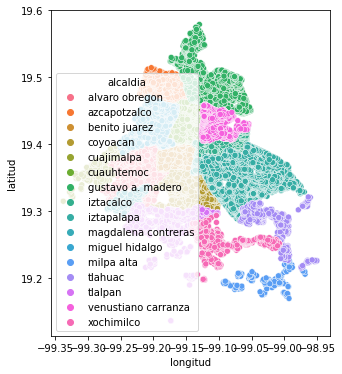

In [123]:
f = plt.subplots(figsize = (5,6))
sns.scatterplot(y = "latitud", x = "longitud", hue = "alcaldia", data = data_consumo_total_mean)

El primer paso es ver si existen diferencias considerables entre bimestres:

<AxesSubplot:xlabel='consumo_total', ylabel='alcaldia'>

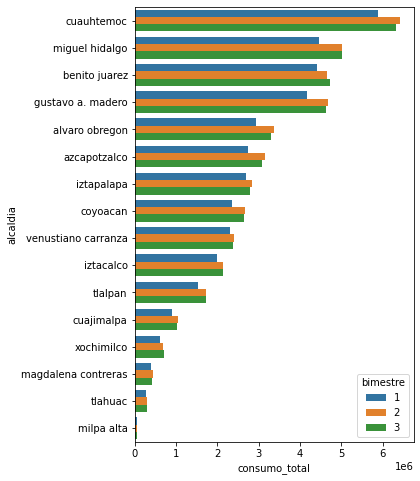

In [127]:
f = plt.subplots(figsize=(5, 8))

sns.barplot(y = "alcaldia", x = "consumo_total", hue = "bimestre", estimator = sum, data = data_clean, ci = None,
            order = ["cuauhtemoc", "miguel hidalgo", "benito juarez", "gustavo a. madero", "alvaro obregon", "azcapotzalco",
                     "iztapalapa", "coyoacan", "venustiano carranza", "iztacalco", "tlalpan", "cuajimalpa", "xochimilco", "magdalena contreras", "tlahuac", "milpa alta"])



Vemos que en este caso, el consumo total para cada delegación no varía mucho entre bimestres. Aunque en general el primer bimestre presenta un consumo más bajo que cualquiera de los otros 2, la diferencia no es tan grande como para tratar profundizar el análisis por bimestre.

Después de este punto, se considerará el promedio de los 3 bimestres como 1 solo

<AxesSubplot:xlabel='consumo_total', ylabel='alcaldia'>

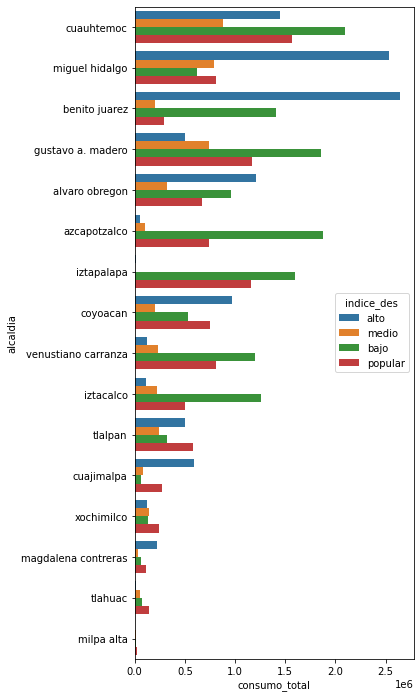

In [118]:
f = plt.subplots(figsize=(5, 12))

sns.barplot(y = "alcaldia", x = "consumo_total", hue = "indice_des", estimator = sum, data = data_consumo_total_mean, ci = None,
           order = ["cuauhtemoc", "miguel hidalgo", "benito juarez", "gustavo a. madero", "alvaro obregon", "azcapotzalco","iztapalapa", 
                    "coyoacan", "venustiano carranza", "iztacalco", "tlalpan", "cuajimalpa", "xochimilco", "magdalena contreras", "tlahuac", "milpa alta"],
           hue_order = ['alto','medio','bajo','popular'])

<AxesSubplot:xlabel='consumo_total', ylabel='indice_des'>

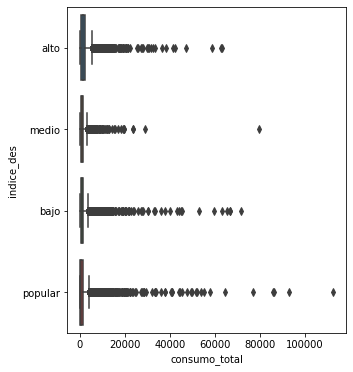

In [120]:
f = plt.subplots(figsize=(5, 6))
sns.boxplot(x = "consumo_total", y = "indice_des", order = ['alto','medio','bajo','popular'],
            data = data_consumo_total_mean)

<AxesSubplot:xlabel='consumo_total', ylabel='indice_des'>

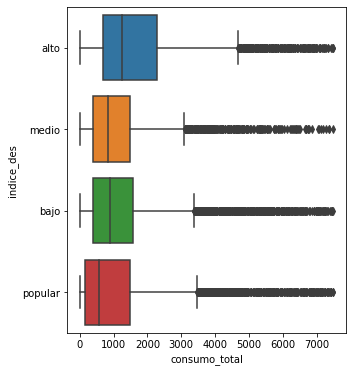

In [122]:
f = plt.subplots(figsize=(5, 6))
sns.boxplot(x = "consumo_total", y = "indice_des",order = ['alto','medio','bajo','popular'],
            data = data_consumo_total_mean[(data_consumo_total_mean.consumo_total < 7500) & (data_consumo_total_mean.consumo_total > 0)])

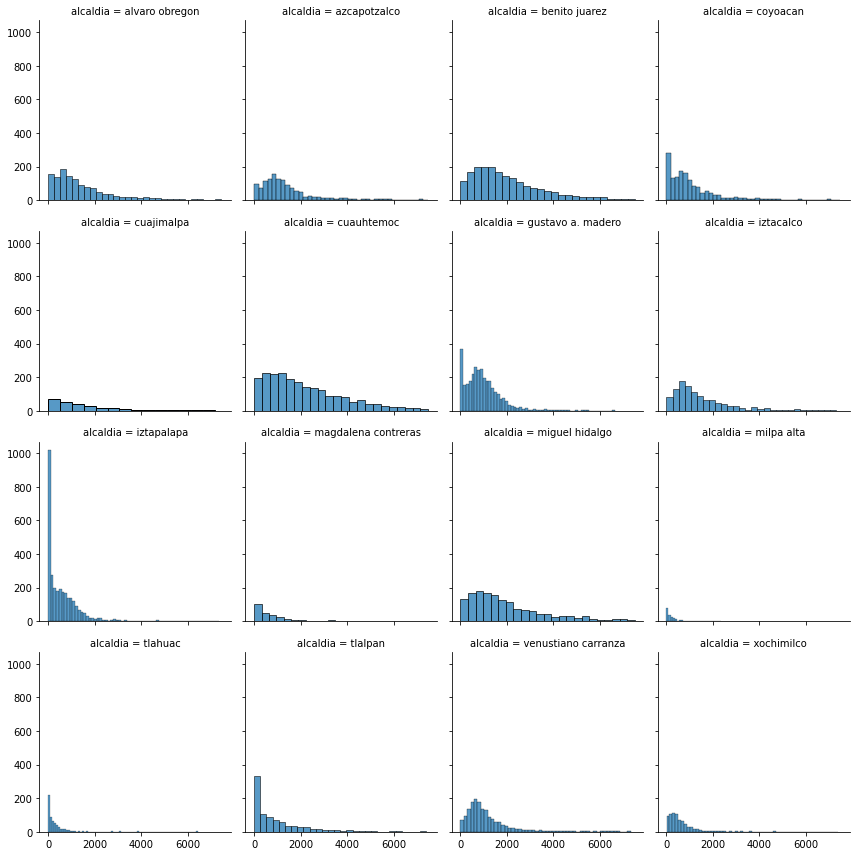

In [37]:
a = sns.FacetGrid(data = data_consumo_total_mean[(data_consumo_total_mean.consumo_total < 7500) &
                                                 (data_consumo_total_mean.consumo_total > 0)],
                  col = "alcaldia", col_wrap = 4, sharex = True, sharey = True)

a.map_dataframe(sns.histplot, x = "consumo_total")

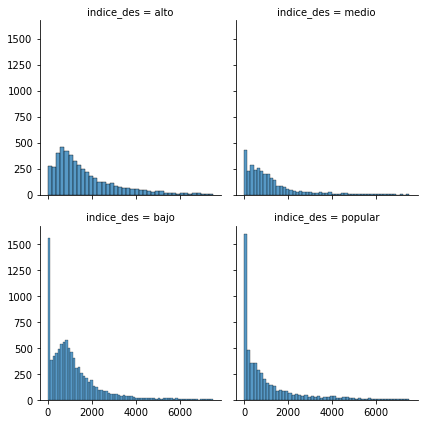

In [44]:
b = sns.FacetGrid(data = data_consumo_total_mean[data_consumo_total_mean.consumo_total < 7500],
                  col = "indice_des", col_wrap = 2, sharex = True, sharey = True, col_order = ['alto','medio', 'bajo','popular'])

b.map_dataframe(sns.histplot, x = "consumo_total")

Analisis de distribución de doméstico, no doméstico y mixto

In [90]:
consumo_total_alcaldia = data_consumo_total_mean.drop(['longitud', 'latitud'], axis = 1).groupby(['alcaldia']).sum().reset_index()

consumo_total_alcaldia['sum_col'] = consumo_total_alcaldia.consumo_total_dom + \
consumo_total_alcaldia.consumo_total_no_dom + \
consumo_total_alcaldia.consumo_total_mixto 

consumo_total_alcaldia['pct_dom'] = consumo_total_alcaldia.consumo_total_dom/ consumo_total_alcaldia.sum_col
consumo_total_alcaldia['pct_no_dom'] = consumo_total_alcaldia.consumo_total_no_dom/ consumo_total_alcaldia.sum_col
consumo_total_alcaldia['pct_mixto'] = consumo_total_alcaldia.consumo_total_mixto/ consumo_total_alcaldia.sum_col


consumo_total_alcaldia['acum_pct_no_dom'] = consumo_total_alcaldia.pct_dom + consumo_total_alcaldia.pct_no_dom
consumo_total_alcaldia['acum_pct_mixto'] = consumo_total_alcaldia.acum_pct_no_dom + consumo_total_alcaldia.pct_mixto

#consumo_total_alcaldia

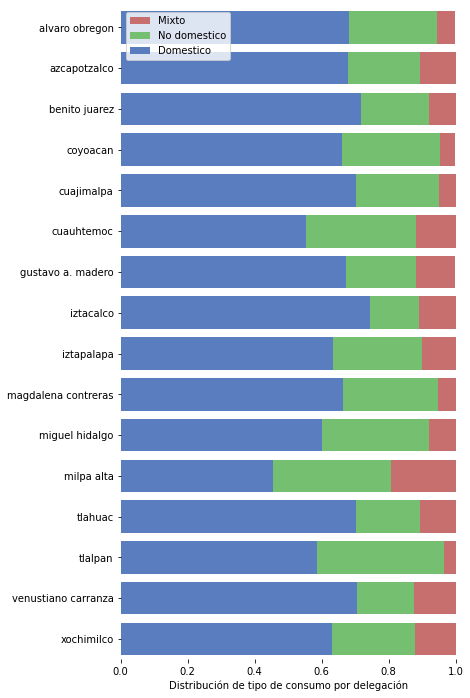

In [114]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 12))

#Mixto
sns.set_color_codes("muted")
sns.barplot(x="acum_pct_mixto", y="alcaldia", data=consumo_total_alcaldia,
            label="Mixto", color="r")

#No doméstico
sns.barplot(x="acum_pct_no_dom", y="alcaldia", data=consumo_total_alcaldia,
            label="No domestico", color="g")

#Doméstico
sns.barplot(x = "pct_dom", y = "alcaldia", data=consumo_total_alcaldia,
            label = "Domestico", color="b")


# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Distribución de tipo de consumo por delegación")
sns.despine(left=True, bottom=True)

In [92]:
consumo_total_indice_des = data_consumo_total_mean.drop(['longitud', 'latitud'], axis = 1).groupby(['indice_des']).sum().reset_index()

consumo_total_indice_des['sum_col'] = consumo_total_indice_des.consumo_total_dom + \
consumo_total_indice_des.consumo_total_no_dom + \
consumo_total_indice_des.consumo_total_mixto 

consumo_total_indice_des['pct_dom'] = consumo_total_indice_des.consumo_total_dom/ consumo_total_indice_des.sum_col
consumo_total_indice_des['pct_no_dom'] = consumo_total_indice_des.consumo_total_no_dom/ consumo_total_indice_des.sum_col
consumo_total_indice_des['pct_mixto'] = consumo_total_indice_des.consumo_total_mixto/ consumo_total_indice_des.sum_col


consumo_total_indice_des['acum_pct_no_dom'] = consumo_total_indice_des.pct_dom + consumo_total_indice_des.pct_no_dom
consumo_total_indice_des['acum_pct_mixto'] = consumo_total_indice_des.acum_pct_no_dom + consumo_total_indice_des.pct_mixto

In [93]:
consumo_total_indice_des

,indice_des,consumo_total,consumo_total_dom,consumo_total_mixto,consumo_total_no_dom,sum_col,pct_dom,pct_no_dom,pct_mixto,acum_pct_no_dom,acum_pct_mixto
0,alto,1.105916e+07,6.550859e+06,8.065751e+05,3.703542e+06,1.106098e+07,0.592250,0.334830,0.072921,0.927079,1.0
1,bajo,1.407402e+07,1.062215e+07,1.742019e+06,1.710941e+06,1.407511e+07,0.754676,0.121558,0.123766,0.876234,1.0
2,medio,4.247328e+06,2.732018e+06,5.580018e+05,9.578266e+05,4.247846e+06,0.643154,0.225485,0.131361,0.868639,1.0
3,popular,9.842499e+06,5.631718e+06,4.836015e+05,3.729023e+06,9.844343e+06,0.572077,0.378799,0.049125,0.950875,1.0


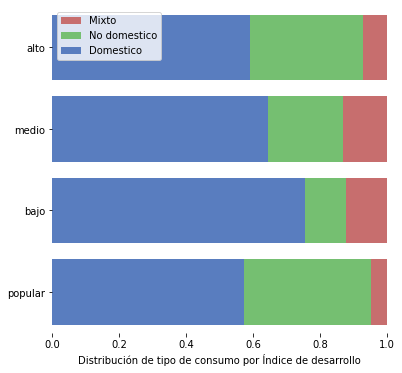

In [102]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

#Mixto
sns.set_color_codes("muted")
sns.barplot(x="acum_pct_mixto", y="indice_des", data=consumo_total_indice_des,
            label="Mixto", color="r", order = ['alto', 'medio', 'bajo', 'popular'])

#No doméstico
sns.barplot(x="acum_pct_no_dom", y="indice_des", data=consumo_total_indice_des,
            label="No domestico", color="g", order = ['alto', 'medio', 'bajo', 'popular'])

#Doméstico
sns.barplot(x = "pct_dom", y = "indice_des", data=consumo_total_indice_des,
            label = "Domestico", color="b", order = ['alto', 'medio', 'bajo', 'popular'])


# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Distribución de tipo de consumo por Índice de desarrollo")
sns.despine(left=True, bottom=True)